In [2]:
#!pip3 install haversine
#!pip3 install shapely
#!pip3 install geopandas
#!pip3 install geojson
#!pip3 install folium

In [3]:
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import json
import time
import random

from haversine import haversine, Unit
import folium
from geopandas import GeoDataFrame, points_from_xy

In [ ]:
API_KEY = ''#API HERE Platform

In [45]:
df_map = pd.read_csv('DATASET_CLEAR.csv')

In [47]:
df_map.head(2)

,Station_name,Station_address,Type_oil,Price,City,Full_address,Coords
0,sociedad de inversiones stevens ltda,AV. GABRIELA MISTRAL 1625,Bencina 93,1227,Los Ángeles,"AV. GABRIELA MISTRAL 1625, Los Ángeles, Chile","(-37.47286, -72.32641)"
1,sociedad de inversiones stevens ltda,AV. GABRIELA MISTRAL 1625,Bencina 95,1254,Los Ángeles,"AV. GABRIELA MISTRAL 1625, Los Ángeles, Chile","(-37.47286, -72.32641)"


In [48]:
df_map['Coords'].value_counts()

Coords
('NA', 'NA')              8
(-37.47286, -72.32641)    4
(-37.4655, -72.32598)     4
(-37.45624, -72.3266)     4
(-37.50587, -72.49245)    4
(-37.47342, -72.32917)    4
(-37.48443, -72.33283)    4
(-37.46083, -72.36423)    4
(-37.46918, -72.34231)    4
(-37.45244, -72.34047)    4
(-37.48203, -72.35815)    4
(-37.47326, -72.35084)    4
(-37.48816, -72.34239)    4
(-37.60006, -72.27833)    4
(-37.4501, -72.32776)     4
(-37.4674, -72.34984)     4
(-37.46444, -72.34796)    4
(-37.46773, -72.33308)    4
(-37.45889, -72.34806)    4
(-37.46383, -72.35498)    4
(-37.47991, -72.36529)    4
(-37.4722, -72.35259)     4
(-37.47991, -72.35666)    4
Name: count, dtype: int64

In [49]:
df_map['Price'] = df_map['Price'].replace('-', '0').astype(int)

In [50]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Station_name     96 non-null     object
 1   Station_address  96 non-null     object
 2   Type_oil         96 non-null     object
 3   Price            96 non-null     int64 
 4   City             96 non-null     object
 5   Full_address     96 non-null     object
 6   Coords           96 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.4+ KB


In [51]:
df_map['Coords'][0]

'(-37.47286, -72.32641)'

In [52]:
float(df_map['Coords'][0].replace('(', '').replace(')', '').split(',')[0])

-37.47286

In [53]:
float(df_map['Coords'][0].replace('(', '').replace(')', '').split(',')[1].strip())

-72.32641

In [54]:
df_map['LAT'] = df_map['Coords'].apply(lambda x : float(x.replace('(', '').replace(')', '').split(',')[0]) if x != "('NA', 'NA')" else 'Empy')
df_map['LNG'] = df_map['Coords'].apply(lambda x : float(x.replace('(', '').replace(')', '').split(',')[1]) if x != "('NA', 'NA')" else 'Empy')

In [55]:
df_map


,Station_name,Station_address,Type_oil,Price,City,Full_address,Coords,LAT,LNG
0,sociedad de inversiones stevens ltda,AV. GABRIELA MISTRAL 1625,Bencina 93,1227,Los Ángeles,"AV. GABRIELA MISTRAL 1625, Los Ángeles, Chile","(-37.47286, -72.32641)",-37.47286,-72.32641
1,sociedad de inversiones stevens ltda,AV. GABRIELA MISTRAL 1625,Bencina 95,1254,Los Ángeles,"AV. GABRIELA MISTRAL 1625, Los Ángeles, Chile","(-37.47286, -72.32641)",-37.47286,-72.32641
2,sociedad de inversiones stevens ltda,AV. GABRIELA MISTRAL 1625,Bencina 97,1278,Los Ángeles,"AV. GABRIELA MISTRAL 1625, Los Ángeles, Chile","(-37.47286, -72.32641)",-37.47286,-72.32641
3,sociedad de inversiones stevens ltda,AV. GABRIELA MISTRAL 1625,Diesel,1039,Los Ángeles,"AV. GABRIELA MISTRAL 1625, Los Ángeles, Chile","(-37.47286, -72.32641)",-37.47286,-72.32641
4,VELOSO S.A.,RUTA PANAMERICANA SUR KM. 506 0,Bencina 93,1221,Los Ángeles,"RUTA PANAMERICANA SUR KM. 506 0, Los Ángeles, ...","(-37.60006, -72.27833)",-37.60006,-72.27833
...,...,...,...,...,...,...,...,...,...
91,Comercial Cardemil Limitada,Avenida Las Industrias 6250,Diesel,1032,Los Ángeles,"Avenida Las Industrias 6250, Los Ángeles, Chile","(-37.45624, -72.3266)",-37.45624,-72.3266
92,Inversiones Enex S.A.,Ruta 5 sur km 493,Bencina 93,1214,Los Ángeles,"Ruta 5 sur km 493, Los Ángeles, Chile","(-37.47991, -72.35666)",-37.47991,-72.35666
93,Inversiones Enex S.A.,Ruta 5 sur km 494,Bencina 95,1254,Los Ángeles,"Ruta 5 sur km 493, Los Ángeles, Chile","(-37.47991, -72.35666)",-37.47991,-72.35666
94,Inversiones Enex S.A.,Ruta 5 sur km 495,Bencina 97,1305,Los Ángeles,"Ruta 5 sur km 493, Los Ángeles, Chile","(-37.47991, -72.35666)",-37.47991,-72.35666


In [56]:
#df_map.to_csv('DATASET_FINAL.csv', index=False)

<h3>Functions<h3>

In [14]:
url = requests.get('https://preciobencina.cl/bencineras-en-comuna-de-losangeles.php')
soup = BeautifulSoup(url.content, 'html.parser')

In [15]:
def Get_Coords(address, API_KEY):
    url = f'https://geocode.search.hereapi.com/v1/geocode?q={address}&apiKey={API_KEY}'
    
    try:
        response = requests.get(url).json()
        CleanAddress = response['items'][0]['title'].upper()
        LAT = response['items'][0]['position']['lat']
        LNG = response['items'][0]['position']['lng']
        
        results = [CleanAddress, LAT, LNG]
        
    except:
        
        results = ['Not found', 'NA', 'NA']
        
    return results

def cal_dist(geo_source, point2, unit):
    
    if unit == 'Km':
        distance = haversine(geo_source, point2, Unit.KILOMETERS)
    elif unit == 'm':
        distance = haversine(geo_source, point2, Unit.METERS)
    elif unit == 'miles':
        distance = haversine(geo_source, point2, Unit.MILES)
        
    return round(distance, 2)

def distance_station(geo_source, df, radio, unit):
    
    distance = []
    source = []
    
    for i in range(len(df)):
        distance.append(cal_dist(geo_source, df['POINT'][i], unit))
        source.append(geo_source)
    
     # Create a copy of the original DataFrame
    new_df = df.copy()
    
    # Add new columns to the DataFrame: 'SOURCE' and 'DISTANCE'
    new_df['SOURCE'] = source
    new_df['DISTANCE'] = distance
    
    # Filter the DataFrame based on the calculated distances within the given radius
    new_df = new_df[new_df['DISTANCE'] <= radio]
    
    # Reset the index of the DataFrame
    new_df = new_df.reset_index()
    
    # Drop the old index column
    new_df = new_df.drop(columns='index')
    
    # Return the filtered and sorted DataFrame based on distance
    return new_df.sort_values(by='DISTANCE', ascending=True)

def transform_df_map(df):
    # Initialize an empty list to store coordinates
    coords = []

    # Loop through the DataFrame
    for i in range(len(df)):
        try:
            # Try to convert 'LAT' and 'LNG' values to float and create a coordinate tuple
            coord = float(df['LAT'][i]), float(df['LNG'][i])
            coords.append(coord)
        except:
            # If conversion is not possible, append 'EMPTY' to the list
            coords.append('EMPTY')

    # Add a new 'POINT' column to the DataFrame with the coordinates
    df['POINT'] = coords
    
    # Filter out rows where 'POINT' is labeled as 'EMPTY'
    df = df[df['POINT'] != 'EMPTY']
    
    # Reset the index of the DataFrame
    df = df.reset_index()
    
    # Drop the old index column
    df = df.drop(columns='index')
    
    # Create a copy of the DataFrame
    new_df = df.copy()

    # Return the transformed DataFrame
    return new_df


<h3>Steps<h3>

In [16]:
cities = list(df_map['City'].unique())
cities

['Los Ángeles']

In [17]:
df_city = df_map[df_map['City'] == cities[0]]
df_city.reset_index(inplace= True)
df_city.drop(columns= 'index', inplace= True)

In [44]:
df_city

,Station_name,Station_address,Type_oil,Price,City,Full_address,Coords,LAT,LNG,POINT
0,sociedad de inversiones stevens ltda,AV. GABRIELA MISTRAL 1625,Bencina 93,1227,Los Ángeles,"AV. GABRIELA MISTRAL 1625, Los Ángeles, Chile","(-37.47286, -72.32641)",-37.47286,-72.32641,"(-37.47286, -72.32641)"
1,sociedad de inversiones stevens ltda,AV. GABRIELA MISTRAL 1625,Bencina 95,1254,Los Ángeles,"AV. GABRIELA MISTRAL 1625, Los Ángeles, Chile","(-37.47286, -72.32641)",-37.47286,-72.32641,"(-37.47286, -72.32641)"
2,sociedad de inversiones stevens ltda,AV. GABRIELA MISTRAL 1625,Bencina 97,1278,Los Ángeles,"AV. GABRIELA MISTRAL 1625, Los Ángeles, Chile","(-37.47286, -72.32641)",-37.47286,-72.32641,"(-37.47286, -72.32641)"
3,sociedad de inversiones stevens ltda,AV. GABRIELA MISTRAL 1625,Diesel,1039,Los Ángeles,"AV. GABRIELA MISTRAL 1625, Los Ángeles, Chile","(-37.47286, -72.32641)",-37.47286,-72.32641,"(-37.47286, -72.32641)"
4,VELOSO S.A.,RUTA PANAMERICANA SUR KM. 506 0,Bencina 93,1221,Los Ángeles,"RUTA PANAMERICANA SUR KM. 506 0, Los Ángeles, ...","(-37.60006, -72.27833)",-37.60006,-72.27833,"(-37.60006, -72.27833)"
...,...,...,...,...,...,...,...,...,...,...
83,Comercial Cardemil Limitada,Avenida Las Industrias 6250,Diesel,1032,Los Ángeles,"Avenida Las Industrias 6250, Los Ángeles, Chile","(-37.45624, -72.3266)",-37.45624,-72.3266,"(-37.45624, -72.3266)"
84,Inversiones Enex S.A.,Ruta 5 sur km 493,Bencina 93,1214,Los Ángeles,"Ruta 5 sur km 493, Los Ángeles, Chile","(-37.47991, -72.35666)",-37.47991,-72.35666,"(-37.47991, -72.35666)"
85,Inversiones Enex S.A.,Ruta 5 sur km 494,Bencina 95,1254,Los Ángeles,"Ruta 5 sur km 493, Los Ángeles, Chile","(-37.47991, -72.35666)",-37.47991,-72.35666,"(-37.47991, -72.35666)"
86,Inversiones Enex S.A.,Ruta 5 sur km 495,Bencina 97,1305,Los Ángeles,"Ruta 5 sur km 493, Los Ángeles, Chile","(-37.47991, -72.35666)",-37.47991,-72.35666,"(-37.47991, -72.35666)"


In [34]:
central_location = 'Caupolicán 399, 4441162 Los Angeles, Bío Bío'
R = Get_Coords(central_location, API_KEY)
R

['CALLE CAUPOLICÁN 399, 4440000 LOS ÁNGELES, BÍOBÍO, CHILE',
 -37.47118,
 -72.35052]

In [35]:
geo_source = R[1], R[2]
geo_source

(-37.47118, -72.35052)

In [21]:
radio = 1
unit = 'Km'

<h3>Show map<h3>

In [22]:
df_city = transform_df_map(df_city)
df_city.head(2)

,Station_name,Station_address,Type_oil,Price,City,Full_address,Coords,LAT,LNG,POINT
0,sociedad de inversiones stevens ltda,AV. GABRIELA MISTRAL 1625,Bencina 93,1227,Los Ángeles,"AV. GABRIELA MISTRAL 1625, Los Ángeles, Chile","(-37.47286, -72.32641)",-37.47286,-72.32641,"(-37.47286, -72.32641)"
1,sociedad de inversiones stevens ltda,AV. GABRIELA MISTRAL 1625,Bencina 95,1254,Los Ángeles,"AV. GABRIELA MISTRAL 1625, Los Ángeles, Chile","(-37.47286, -72.32641)",-37.47286,-72.32641,"(-37.47286, -72.32641)"


In [39]:
results = distance_station(geo_source, df_city, radio, unit)
results.reset_index(inplace=True)
results.drop(columns='index', inplace=True)

In [40]:
gdf_results = GeoDataFrame(results, geometry= points_from_xy(results.LNG, results.LAT))

In [43]:
gdf_results

,Station_name,Station_address,Type_oil,Price,City,Full_address,Coords,LAT,LNG,POINT,SOURCE,DISTANCE,geometry
0,Sociedad Comercial Urquieta Huerta Limit...,VALDIVIA 100,Bencina 93,1223,Los Ángeles,"VALDIVIA 100, Los Ángeles, Chile","(-37.4722, -72.35259)",-37.4722,-72.35259,"(-37.4722, -72.35259)","(-37.47118, -72.35052)",0.22,POINT (-72.35259 -37.47220)
1,Sociedad Comercial Urquieta Huerta Limit...,VALDIVIA 100,Bencina 95,1249,Los Ángeles,"VALDIVIA 100, Los Ángeles, Chile","(-37.4722, -72.35259)",-37.4722,-72.35259,"(-37.4722, -72.35259)","(-37.47118, -72.35052)",0.22,POINT (-72.35259 -37.47220)
2,Sociedad Comercial Urquieta Huerta Limit...,VALDIVIA 100,Bencina 97,1272,Los Ángeles,"VALDIVIA 100, Los Ángeles, Chile","(-37.4722, -72.35259)",-37.4722,-72.35259,"(-37.4722, -72.35259)","(-37.47118, -72.35052)",0.22,POINT (-72.35259 -37.47220)
3,Sociedad Comercial Urquieta Huerta Limit...,VALDIVIA 100,Diesel,1037,Los Ángeles,"VALDIVIA 100, Los Ángeles, Chile","(-37.4722, -72.35259)",-37.4722,-72.35259,"(-37.4722, -72.35259)","(-37.47118, -72.35052)",0.22,POINT (-72.35259 -37.47220)
4,DISTRIBUIDORA DE COMBUSTIBLES CYC SPA,OHiggins 100,Diesel,1034,Los Ángeles,"OHiggins 100, Los Ángeles, Chile","(-37.47326, -72.35084)",-37.47326,-72.35084,"(-37.47326, -72.35084)","(-37.47118, -72.35052)",0.23,POINT (-72.35084 -37.47326)
5,DISTRIBUIDORA DE COMBUSTIBLES CYC SPA,OHiggins 100,Bencina 97,1268,Los Ángeles,"OHiggins 100, Los Ángeles, Chile","(-37.47326, -72.35084)",-37.47326,-72.35084,"(-37.47326, -72.35084)","(-37.47118, -72.35052)",0.23,POINT (-72.35084 -37.47326)
6,DISTRIBUIDORA DE COMBUSTIBLES CYC SPA,OHiggins 100,Bencina 95,1245,Los Ángeles,"OHiggins 100, Los Ángeles, Chile","(-37.47326, -72.35084)",-37.47326,-72.35084,"(-37.47326, -72.35084)","(-37.47118, -72.35052)",0.23,POINT (-72.35084 -37.47326)
7,DISTRIBUIDORA DE COMBUSTIBLES CYC SPA,OHiggins 100,Bencina 93,1220,Los Ángeles,"OHiggins 100, Los Ángeles, Chile","(-37.47326, -72.35084)",-37.47326,-72.35084,"(-37.47326, -72.35084)","(-37.47118, -72.35052)",0.23,POINT (-72.35084 -37.47326)
8,HUGO NAJLE HAYE,Diego de Almagro 1806,Diesel,1021,Los Ángeles,"Diego de Almagro 1806, Los Ángeles, Chile","(-37.4674, -72.34984)",-37.4674,-72.34984,"(-37.4674, -72.34984)","(-37.47118, -72.35052)",0.42,POINT (-72.34984 -37.46740)
9,HUGO NAJLE HAYE,Diego de Almagro 1806,Bencina 97,0,Los Ángeles,"Diego de Almagro 1806, Los Ángeles, Chile","(-37.4674, -72.34984)",-37.4674,-72.34984,"(-37.4674, -72.34984)","(-37.47118, -72.35052)",0.42,POINT (-72.34984 -37.46740)


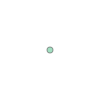

In [42]:
gdf_results['geometry'][0]

In [27]:
oil = list(gdf_results['Type_oil'].unique())
oil[1]

'Bencina 95'

In [28]:
gdf_results2 = gdf_results[gdf_results['Type_oil']==oil[1]]
gdf_results2.reset_index(inplace=True)
gdf_results2.drop(columns='index', inplace=True)

/tmp/ipykernel_3873/4112597693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_results2.drop(columns='index', inplace=True)


In [29]:
gdf_results2.columns

Index(['Station_name', 'Station_address', 'Type_oil', 'Price', 'City',
       'Full_address', 'Coords', 'LAT', 'LNG', 'POINT', 'SOURCE', 'DISTANCE',
       'geometry'],
      dtype='object')

In [30]:
gdf_results2['Price'].min()

1225

In [31]:
gdf_results2['Price'].max()

1249

In [32]:
def marker_station(df, mapa, unit, oil, icono):
    # Filter the DataFrame based on the specified oil type
    df = df[df['Type_oil'] == oil]
    df = df.reset_index()
    df = df.drop(columns='index')

    # Iterate through the rows of the DataFrame
    for i in range(len(df)):
        # Check if the current row has the minimum price
        if df['Price'][i] == df['Price'].min():
            # Create HTML content for the popup
            html = f"""<b>ESTACIÓN:</b> {df.Station_name[i]} <br>
                       <b>PRODUCTO:</b> {df.Type_oil[i]} <br>
                       <b>PRECIO:</b> {df.Price[i]} <br>
                       <b>DISTANCE:</b> {round(df.DISTANCE[i], 2)}<br>
                       <b>DIRECCION:</b> {df.Station_address[i]}<br>
                       <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html, figsize=(6, 3))
            popup = folium.Popup(iframe)

            # Add a marker to the map with a dark green color and the specified icon
            folium.Marker(location=[float(df['LAT'][i]), float(df['LNG'][i])],
                          icon=folium.Icon(color='darkgreen', icon_color='white', icon=icono, prefix='glyphicon'),
                          popup=popup).add_to(mapa)
        # Check if the current row has the maximum price
        elif df['Price'][i] == df['Price'].max():
            # Create HTML content for the popup
            html = f"""<b>ESTACIÓN:</b> {df.Station_name[i]} <br>
                       <b>PRODUCTO:</b> {df.Type_oil[i]} <br>
                       <b>PRECIO:</b> {df.Price[i]} <br>
                       <b>DISTANCE:</b> {round(df.DISTANCE[i], 2)}<br>
                       <b>DIRECCION:</b> {df.Station_address[i]}<br>
                       <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html, figsize=(6, 3))
            popup = folium.Popup(iframe)

            # Add a marker to the map with a dark red color and the specified icon
            folium.Marker(location=[float(df['LAT'][i]), float(df['LNG'][i])],
                          icon=folium.Icon(color='darkred', icon_color='white', icon=icono, prefix='glyphicon'),
                          popup=popup).add_to(mapa)
        # If the current row does not have the minimum or maximum price
        else:
            # Create HTML content for the popup
            html = f"""<b>ESTACIÓN:</b> {df.Station_name[i]} <br>
                       <b>PRODUCTO:</b> {df.Type_oil[i]} <br>
                       <b>PRECIO:</b> {df.Price[i]} <br>
                       <b>DISTANCE:</b> {round(df.DISTANCE[i], 2)}<br>
                       <b>DIRECCION:</b> {df.Station_address[i]}<br>
                       <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html, figsize=(6, 3))
            popup = folium.Popup(iframe)

            # Add a marker to the map with an orange color and the specified icon
            folium.Marker(location=[float(df['LAT'][i]), float(df['LNG'][i])],
                          icon=folium.Icon(color='orange', icon_color='white', icon=icono, prefix='glyphicon'),
                          popup=popup).add_to(mapa)
    
    # The function does not return anything; it modifies the 'mapa' object in place
    return

In [33]:
m = folium.Map([geo_source[0], geo_source[1]], zoom_start= 15)

folium.Circle(
    radius= int(radio) * 1000,
    location = [geo_source[0], geo_source[1]],
    color = 'green',
    fill = 'green'
).add_to(m)

folium.Marker(
    location = [geo_source[0], geo_source[1]],
    icon= folium.Icon(color='black', icon_color='white', icon= 'home', prefix= 'glyphicon'),
    popup= 'Municipalidad</br>'
).add_to(m)

marker_station(gdf_results2, m, unit, oil[1], 'usd')
m